# Premier League Football Betting Odds

#### Author: Petar Sarajcev, PhD; University of Split, FESB, Croatia. (petar.sarajcev@fesb.hr)

### Analysis of 2016 - 2017 Premier League Football Season using Hierarchical Bayesian Models

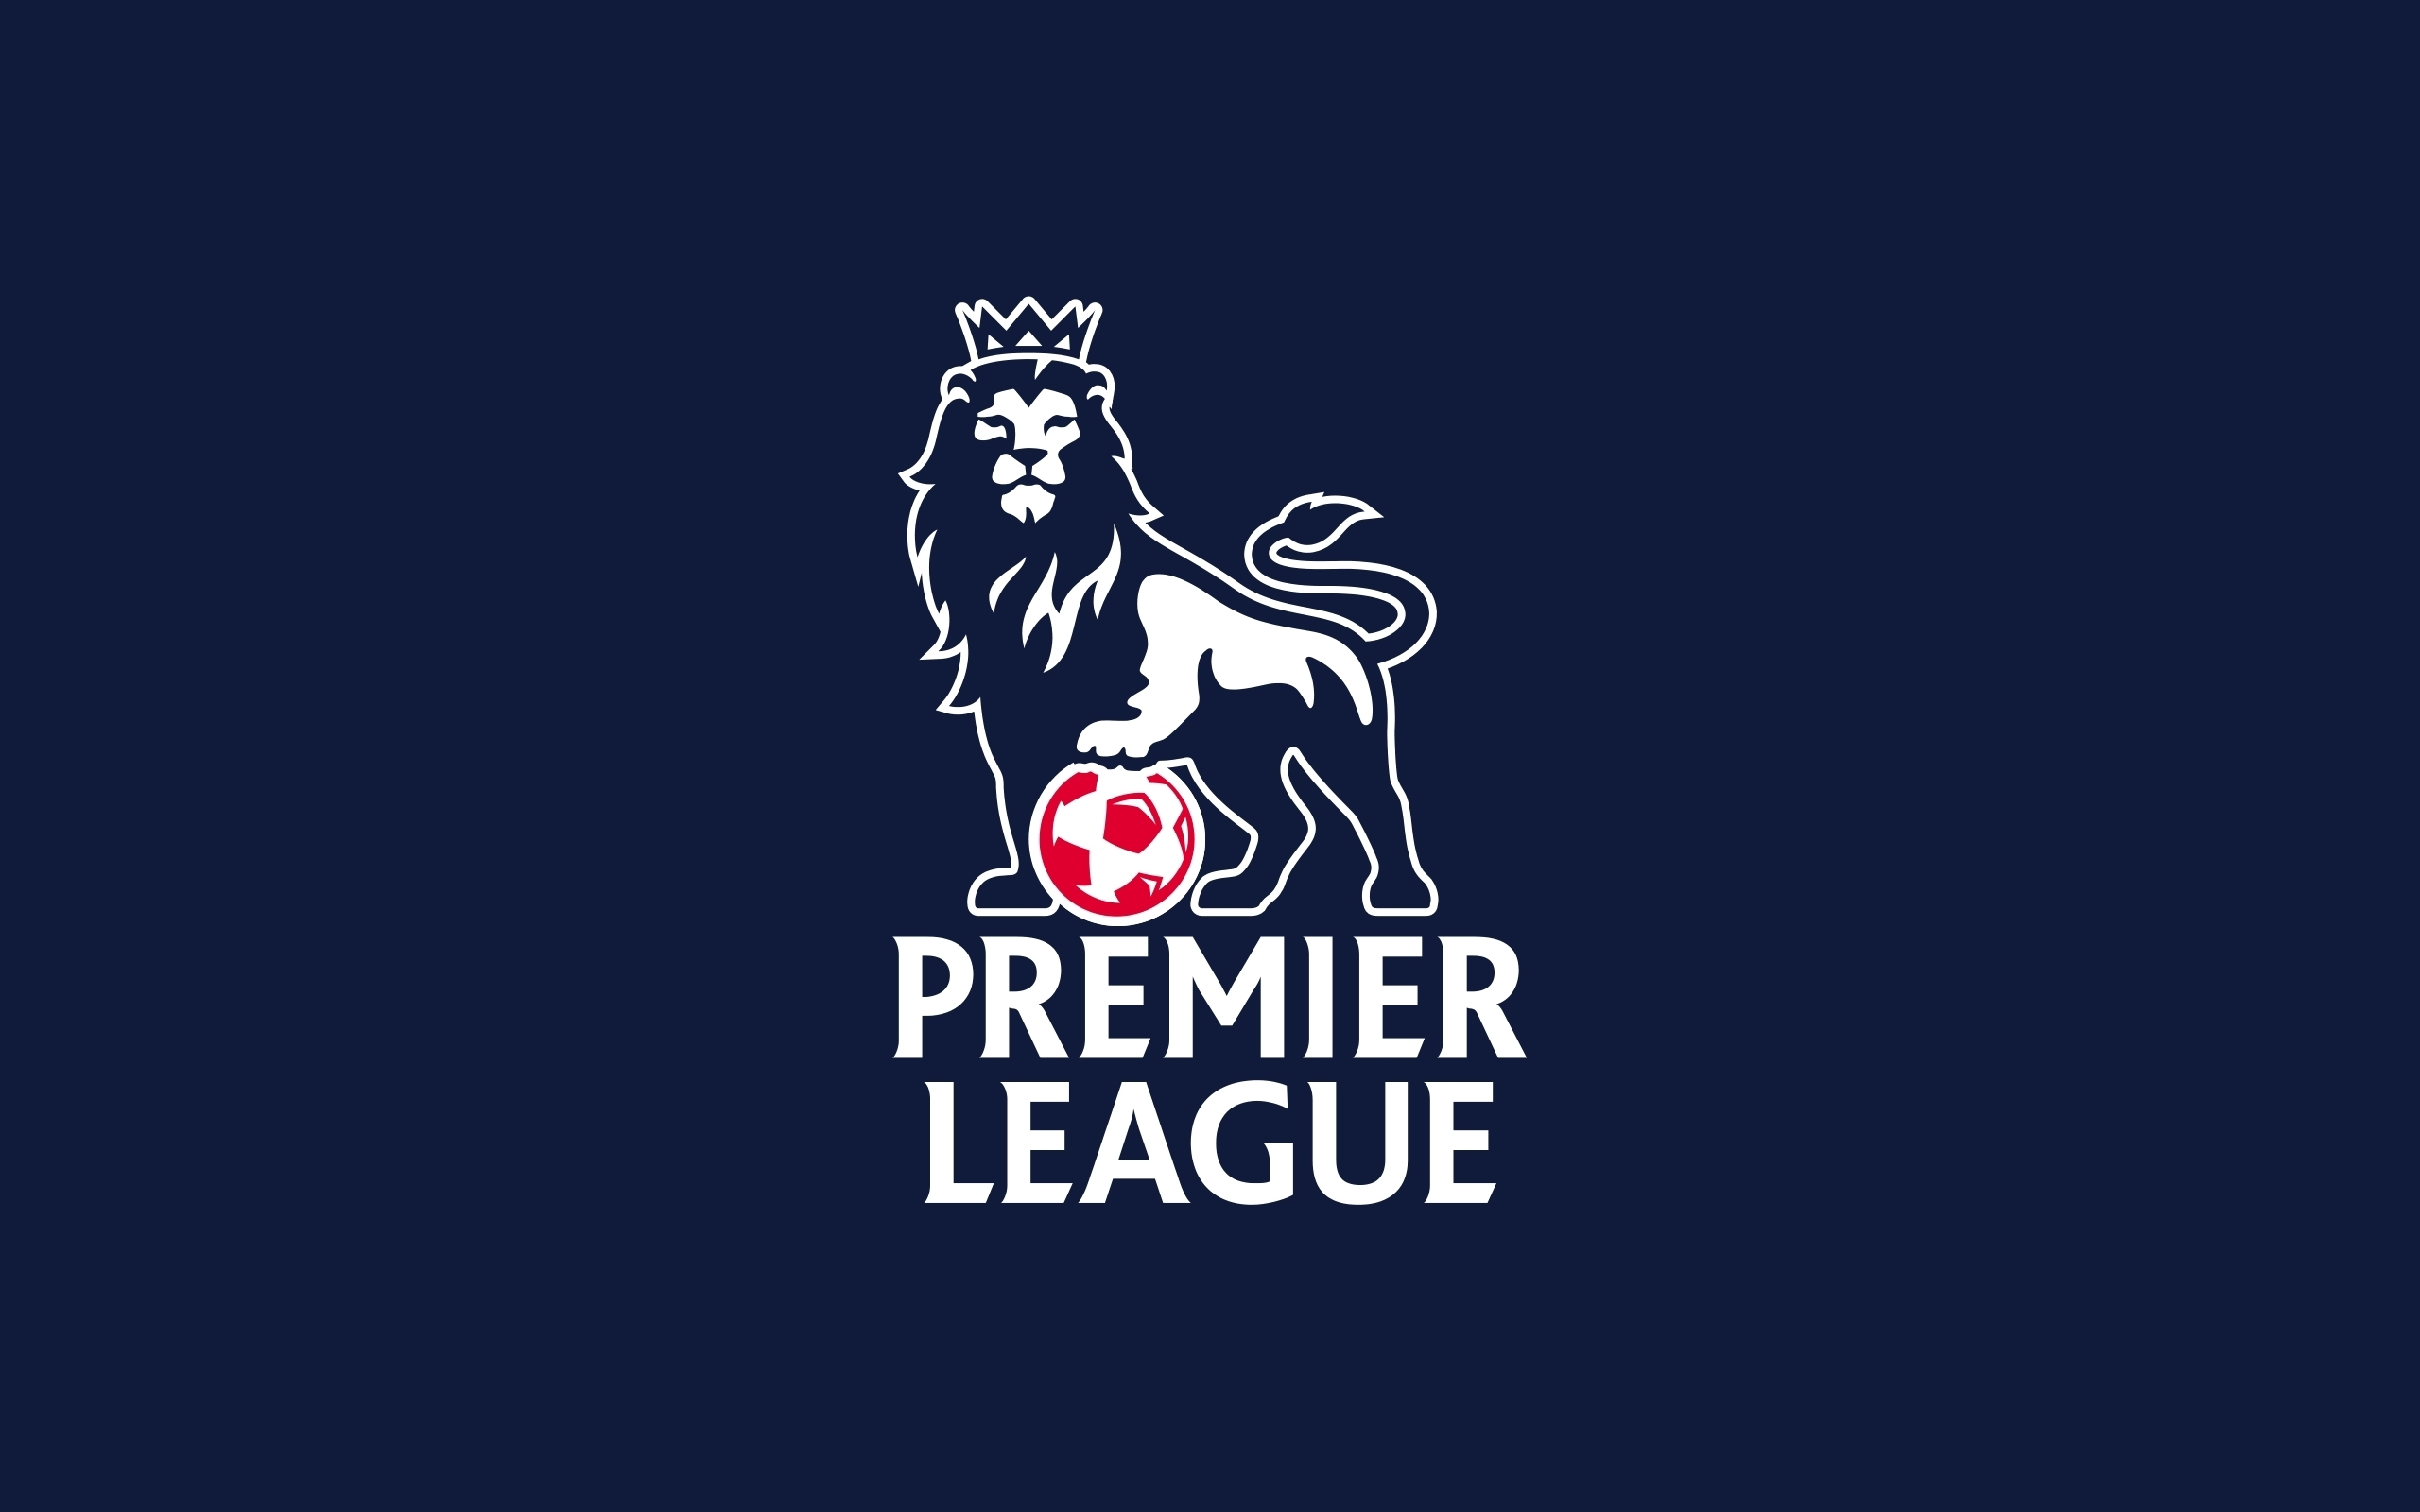

In [3]:
Image(filename='premier_league_logo.jpeg', width=600, height=400)

This post is heavily influenced and reuses code from the following blog post:

http://danielweitzenfeld.github.io/passtheroc/blog/2014/10/28/bayes-premier-league/

Hierarchical Bayesian Model is based on the following paper:

http://docs.pymc.io/notebooks/www.statistica.it/gianluca/Research/BaioBlangiardo.pdf

In [1]:
from __future__ import print_function

In [2]:
from IPython.display import Image

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm

import theano.tensor as tt
import matplotlib.pyplot as plt

In [5]:
from sklearn.cluster import KMeans

In [6]:
%matplotlib inline

In [7]:
sns.set(context='notebook', style='darkgrid', font_scale=1.2)

Premier League data for the 2016 - 2017 season is awailable here:

https://en.wikipedia.org/wiki/2016–17_Premier_League

### 2016 - 2017 Premier League Season data

In [8]:
data = pd.read_csv('premier_2016-17.csv', sep='\t', index_col=0, encoding='utf-8')
data

,ARS,BOU,BUR,CHE,CRY,EVE,HUL,LEI,LIV,MCI,MUN,MID,SOU,STK,SUN,SWA,TOT,WAT,WBA,WHU
Home \ Away,,,,,,,,,,,,,,,,,,,,
Arsenal,—,3–1,2–1,3–0,2–0,3–1,2–0,1–0,3–4,2–2,2–0,0–0,2–1,3–1,2–0,3–2,1–1,1–2,1–0,3–0
Bournemouth,3–3,—,2–1,1–3,0–2,1–0,6–1,1–0,4–3,0–2,1–3,4–0,1–3,2–2,1–2,2–0,0–0,2–2,1–0,3–2
Burnley,0–1,3–2,—,1–1,3–2,2–1,1–1,1–0,2–0,1–2,0–2,1–0,1–0,1–0,4–1,0–1,0–2,2–0,2–2,1–2
Chelsea,3–1,3–0,3–0,—,1–2,5–0,2–0,3–0,1–2,2–1,4–0,3–0,4–2,4–2,5–1,3–1,2–1,4–3,1–0,2–1
Crystal Palace,3–0,1–1,0–2,0–1,—,0–1,4–0,2–2,2–4,1–2,1–2,1–0,3–0,4–1,0–4,1–2,0–1,1–0,0–1,0–1
Everton,2–1,6–3,3–1,0–3,1–1,—,4–0,4–2,0–1,4–0,1–1,3–1,3–0,1–0,2–0,1–1,1–1,1–0,3–0,2–0
Hull City,1–4,3–1,1–1,0–2,3–3,2–2,—,2–1,2–0,0–3,0–1,4–2,2–1,0–2,0–2,2–1,1–7,2–0,1–1,2–1
Leicester City,0–0,1–1,3–0,0–3,3–1,0–2,3–1,—,3–1,4–2,0–3,2–2,0–0,2–0,2–0,2–1,1–6,3–0,1–2,1–0
Liverpool,3–1,2–2,2–1,1–1,1–2,3–1,5–1,4–1,—,1–0,0–0,3–0,0–0,4–1,2–0,2–3,2–0,6–1,2–1,2–2


In [9]:
data.iloc[0,1]

u'3\u20131'

In [10]:
rows = []
for i in range(len(data.index)):
    for j in range(len(data.columns)):
        if i == j:
            continue
        cell = data.iloc[i,j]
        score = [int(k) for k in cell.split(u'\u2013')]
        rows.append([data.columns[i], data.columns[j], score[0], score[1]])
df = pd.DataFrame(rows, columns=['home', 'away', 'home_s', 'away_s'])

There are twenty (20) teams playing in the 2016 - 2017 Premier League season, as follows:

In [11]:
teams = data.columns.values
teams = pd.DataFrame(teams, columns=['team'])
teams['name'] = data.index
teams['i'] = teams.index
teams

,team,name,i
0,ARS,Arsenal,0
1,BOU,Bournemouth,1
2,BUR,Burnley,2
3,CHE,Chelsea,3
4,CRY,Crystal Palace,4
5,EVE,Everton,5
6,HUL,Hull City,6
7,LEI,Leicester City,7
8,LIV,Liverpool,8
9,MCI,Manchester City,9


In [12]:
# make a copy at this point for further reference
teams_freeze = teams.copy()

In [13]:
df = pd.merge(df, teams, left_on='home', right_on='team', how='left')
df = df.rename(columns={'i':'home_i'})
df = df.drop(labels=['team', 'name'], axis=1)
df = pd.merge(df, teams, left_on='away', right_on='team', how='left')
df = df.rename(columns={'i':'away_i'})
df = df.drop(labels=['team', 'name'], axis=1)

In [14]:
# make a copy at this point for further reference
df_freeze = df.copy()

In [15]:
def home_outcome(home, away):
    if home > away:
        outcome = 'win'
    elif home < away:
        outcome = 'loss'
    else:
        outcome = 'draw'
    return outcome

def away_outcome(home, away):
    if home < away:
        outcome = 'win'
    elif home > away:
        outcome = 'loss'
    else:
        outcome = 'draw'
    return outcome    

In [16]:
df['home_outcome'] = df.apply(lambda x: home_outcome(x['home_s'], x['away_s']), axis=1)
df['away_outcome'] = df.apply(lambda x: away_outcome(x['home_s'], x['away_s']), axis=1)
df = df.join(pd.get_dummies(df['home_outcome'], prefix='home'))
df = df.join(pd.get_dummies(df['away_outcome'], prefix='away'))

In [17]:
def season_table(season, teams):
    g = season.groupby('home_i')
    home = pd.DataFrame({'home_goals':g['home_s'].sum(),
                         'home_goals_against':g['away_s'].sum(),
                         'home_wins':g['home_win'].sum(),
                         'home_draws':g['home_draw'].sum(),
                         'home_losses':g['home_loss'].sum()})
    g = season.groupby('away_i')
    away = pd.DataFrame({'away_goals':g['away_s'].sum(),
                         'away_goals_against':g['home_s'].sum(),
                         'away_wins':g['away_win'].sum(),
                         'away_draws':g['away_draw'].sum(),
                         'away_losses':g['away_loss'].sum()})
    df = home.join(away)
    df['W'] = df['home_wins'] + df['away_wins']
    df['D'] = df['home_draws'] + df['away_draws']
    df['L'] = df['home_losses'] + df['away_losses']
    df['Pts'] = df['W']*3 + df['D']
    df['GF'] = df['home_goals'] + df['away_goals']
    df['GA'] = df['home_goals_against'] + df['away_goals_against']
    df['GD'] = df['GF'] - df['GA']
    df = pd.merge(teams, df, left_on='i', right_index=True)
    df = df.sort_values(by=['Pts', 'GD'], ascending=False).reset_index()
    df['Pos'] = df.index.values + 1
    df['Pld'] = len(df['team']) + len(df['team']) - 2
    table = df[['Pos', 'name', 'team', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']]
    return table

### 2016 - 2017 Season Table

In [18]:
premier_league = season_table(df, teams)
premier_league

,Pos,name,team,Pld,W,D,L,GF,GA,GD,Pts
0,1,Chelsea,CHE,38,30,3,5,85,33,52,93
1,2,Tottenham Hotspur,TOT,38,26,8,4,86,26,60,86
2,3,Manchester City,MCI,38,23,9,6,80,39,41,78
3,4,Liverpool,LIV,38,22,10,6,78,42,36,76
4,5,Arsenal,ARS,38,23,6,9,77,44,33,75
5,6,Manchester United,MUN,38,18,15,5,54,29,25,69
6,7,Everton,EVE,38,17,10,11,62,44,18,61
7,8,Southampton,SOU,38,12,10,16,41,48,-7,46
8,9,Bournemouth,BOU,38,12,10,16,55,67,-12,46
9,10,West Bromwich Albion,WBA,38,12,9,17,43,51,-8,45


In [19]:
obs_home_gols = df['home_s'].values
obs_away_gols = df['away_s'].values
home_team = df['home_i'].values
away_team = df['away_i'].values
num_teams = len(teams['i'].values)
num_games = len(df.index)

### Hierarchical Bayesian Model

Likelihoods of the observed data, which represent goals scored in season games, assume Poisson distributions:

$y_{gj} | \theta_{g,j} = \textit{Poisson}(\theta_{g_j})$

where $\theta_{gj} = (\theta_{g1}, \theta_{g2})$ represents scoring intensity in the g-th game for the team playing at home (j=1) and away (j=2), respectively. These are depicted by the log-linear model, as follows:

$\log \theta_{g1} = \textit{intercept} + \textit{home} + \textit{att}_{h(g)} + \textit{def}_{a(g)} $

$\log \theta_{g2} = \textit{intercept} + \textit{att}_{a(g)} + \textit{def}_{h(g)}$

Note that each team's strength is defined by the attacking and the defending strength, and these depend on where the team is playing (h - home, a - away). Parameter *home* represents home team advantage, and in this model it is assumed to be constant across teams. The priors on the *home* and *intercept* parameters are flat. Normal distributions are used as follows:

$\textit{home} \sim N(\mu=0, \tau=0.0001)$

$\textit{intercept} \sim N(\mu=0, \tau=0.0001)$

The team-specific effects are modeled as exchangeable:

$\textit{att}_t \sim N(\mu=0, \tau=\tau_{att})$

$\textit{def}_t \sim N(\mu=0, \tau=\tau_{def})$

To ensure identifiability, a sum-to-zero constraint is imposed on the attack and defense parameters:

$\sum_{t=1}^{Nt} \textit{att}_t$

$\sum_{t=1}^{Nt} \textit{def}_t$

where $N_t$ is the number of teams.

The hyper-priors on the attack and defense parameters are also flat:

$\tau_{att} \sim Gamma(\alpha=0.1, \beta=0.1)$

$\tau_{def} \sim Gamma(\alpha=0.1, \beta=0.1)$

In [20]:
with pm.Model() as model:
    # Hyper-parameters
    home = pm.Normal('home', mu=0., tau=0.0001)
    tau_att = pm.Gamma('tau_att', alpha=0.1, beta=0.1)
    tau_def = pm.Gamma('tau_def', alpha=0.1, beta=0.1)
    intercept = pm.Normal('intercept', mu=0., tau=0.0001)
    # Team-specific model parameters
    atts_star = pm.Normal("atts_star", mu=0., tau=tau_att, shape=num_teams)
    defs_star = pm.Normal("defs_star", mu=0., tau=tau_def, shape=num_teams)
    # Reparameterization
    atts = pm.Deterministic('atts', atts_star - tt.mean(atts_star))
    defs = pm.Deterministic('defs', defs_star - tt.mean(defs_star))
    # Model
    home_theta = tt.exp(intercept + home + atts[home_team] + defs[away_team])
    away_theta = tt.exp(intercept + atts[away_team] + defs[home_team])
    # Likelihood of observed data
    home_points = pm.Poisson('home_points', mu=home_theta, observed=obs_home_gols)
    away_points = pm.Poisson('away_points', mu=away_theta, observed=obs_away_gols)
    # MCMC
    chain = pm.sample(20000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 22000/22000 [00:31<00:00, 694.99it/s]


In [21]:
burn = 0; thin = 1  # burn-in & thinning
trace = chain[burn::thin]

In [22]:
var_names = ['home', 'intercept', 'atts', 'defs']

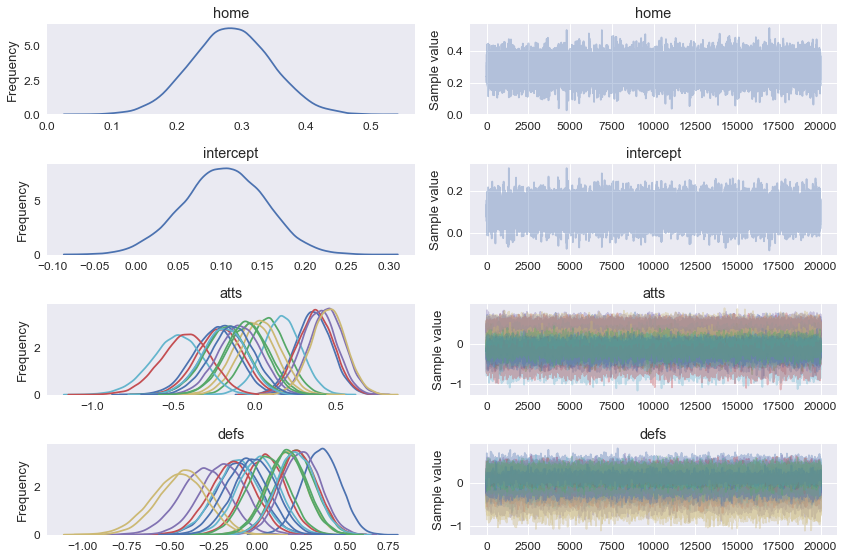

In [23]:
pm.traceplot(trace, varnames=var_names);

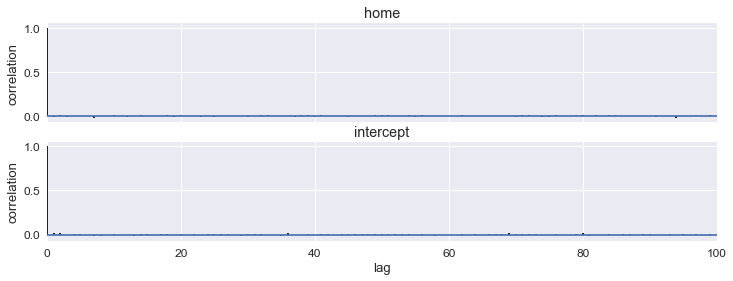

In [24]:
pm.autocorrplot(trace, varnames=var_names[0:2]);

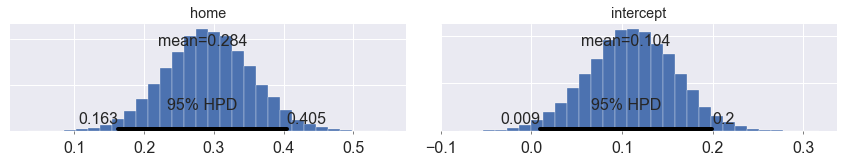

In [25]:
pm.plot_posterior(trace, varnames=['home', 'intercept']);

In [26]:
x_vals = trace['atts'].mean(axis=0)
y_vals = trace['defs'].mean(axis=0)

The model determines the **quality** of each team using its **attack effect** and its **defense effect**, which are defined on a scale ranging between -1 and 1. 

A team with strong attacking capability has positive attack effect, while a team with weak attacking capability has negative attack effect. At the same time, a team with strong defending capability has negative defense effect, while a team with the poor defensive capability has positive defense effect.

This means that the teams with the strong attack and strong defense will be in the lower right quadrant of the graph, while teams with weak attack and defense will be in the upper left quadrant.

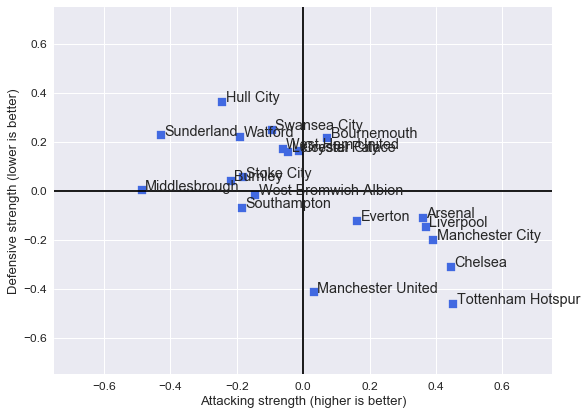

In [27]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x_vals, y_vals, marker='s', s=50, c='royalblue')
for label, x, y in zip(teams['name'].values, x_vals, y_vals):
    ax.annotate(label, xy=(x,y), xytext=(x+0.01,y))
ax.set_xlabel('Attacking strength (higher is better)')
ax.set_ylabel('Defensive strength (lower is better)')
ax.set_xlim(-0.75, 0.75)
ax.hlines(0, *ax.get_xlim())
ax.set_ylim(-0.75, 0.75)
ax.vlines(0, *ax.get_ylim())
plt.tight_layout()
plt.show()

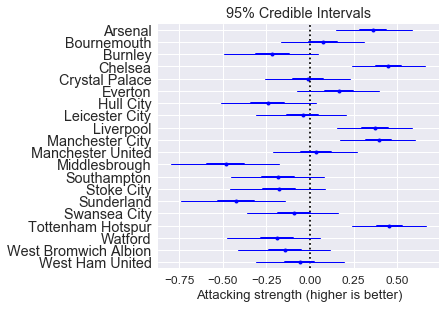

In [28]:
pm.forestplot(trace, varnames=['atts'], ylabels=teams['name'].values, 
              xtitle='Attacking strength (higher is better)');

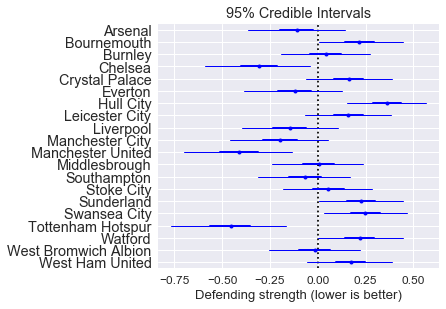

In [29]:
pm.forestplot(trace, varnames=['defs'], ylabels=teams['name'].values, 
              xtitle='Defending strength (lower is better)');

In [30]:
att_hpd = pm.hpd(trace['atts'])
def_hpd = pm.hpd(trace['defs'])

Teams with strong attacking strength will have bars above the zero, while teams with weak attacking strength will have bars below the zero. The longer the bar is, the more pronounced is the effect.

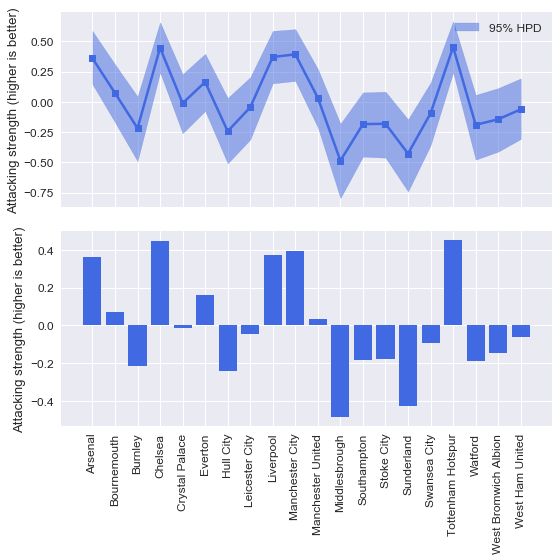

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8,8))
ax[0].plot(teams['name'].values, x_vals, ls='-', c='royalblue', lw=2.5, marker='s')
ax[0].fill_between(teams['name'].values, att_hpd[:,0], att_hpd[:,1], 
                color='royalblue', alpha=0.5, label='95% HPD')
ax[0].legend(loc='upper right')
ax[0].set_ylabel('Attacking strength (higher is better)')
ax[1].bar(teams['name'].values, x_vals, color='royalblue')
ax[1].set_ylabel('Attacking strength (higher is better)')
ax[1].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

Teams with strong defensive strength will have bars below the zero, while teams with weak defensive strength will have bars above the zero. The longer the bar is, the more pronounced is the effect.

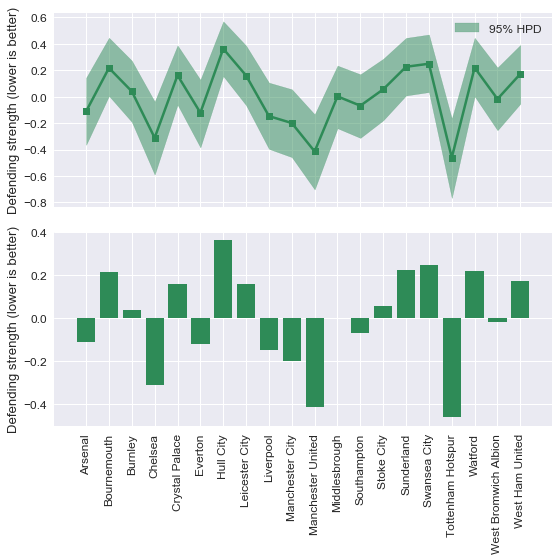

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8,8))
ax[0].plot(teams['name'].values, y_vals, ls='-', c='seagreen', lw=2.5, marker='s')
ax[0].fill_between(teams['name'].values, def_hpd[:,0], def_hpd[:,1], 
                color='seagreen', alpha=0.5, label='95% HPD')
ax[0].legend(loc='upper right')
ax[0].set_ylabel('Defending strength (lower is better)')
ax[1].bar(teams['name'].values, y_vals, color='seagreen')
ax[1].set_ylabel('Defending strength (lower is better)')
ax[1].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

### Hierarchical Bayesian Model with two groups (Top teams and the rest)

In [39]:
with pm.Model() as model2:
    # Hyper-parameters
    home = pm.Normal('home', mu=0., tau=0.0001)
    tau_att = pm.Gamma('tau_att', alpha=0.1, beta=0.1, shape=2)
    tau_def = pm.Gamma('tau_def', alpha=0.1, beta=0.1, shape=2)
    BoundedNormalLow = pm.Bound(pm.Normal, lower=-3., upper=0.)
    BoundedNormalHig = pm.Bound(pm.Normal, lower=0., upper=3.)
    mu_att1 = BoundedNormalHig('mu_att1', mu=0., tau=0.001)  # TOP 
    mu_def1 = BoundedNormalLow('mu_def1', mu=0., tau=0.001)  # TEAMS
    mu_att2 = pm.Normal('mu_att2', mu=0., tau=0.0001)  # THE
    mu_def2 = pm.Normal('mu_def2', mu=0., tau=0.0001)  # REST
    grp = pm.Categorical('grp', p=np.asarray([0.5, 0.5]), shape=num_teams)
    mu_att = pm.Deterministic('mu_att', tt.as_tensor_variable([mu_att1, mu_att2]))
    mu_def = pm.Deterministic('mu_def', tt.as_tensor_variable([mu_def1, mu_def2]))  
    # Team-specific model parameters
    atts_star = pm.Normal("atts_star", mu=mu_att[grp], tau=tau_att[grp], shape=num_teams)
    defs_star = pm.Normal("defs_star", mu=mu_def[grp], tau=tau_def[grp], shape=num_teams)
    # Reparameterization
    atts = pm.Deterministic('atts', atts_star - tt.mean(atts_star))
    defs = pm.Deterministic('defs', defs_star - tt.mean(defs_star))
    # Model
    home_theta = tt.exp(home + atts[home_team] + defs[away_team])
    away_theta = tt.exp(atts[away_team] + defs[home_team])
    # Likelihoods of the observed data
    home_points = pm.Poisson('home_points', mu=home_theta, observed=obs_home_gols)
    away_points = pm.Poisson('away_points', mu=away_theta, observed=obs_away_gols)
    # MCMC
    chain = pm.sample(draws=20000, tune=2000, nuts_kwargs={'target_accept':0.95},
                      discard_tuned_samples=True)

Assigned NUTS to home
Assigned NUTS to tau_att_log__
Assigned NUTS to tau_def_log__
Assigned NUTS to mu_att1_interval__
Assigned NUTS to mu_def1_interval__
Assigned NUTS to mu_att2
Assigned NUTS to mu_def2
Assigned BinaryGibbsMetropolis to grp
Assigned NUTS to atts_star
Assigned NUTS to defs_star
100%|██████████| 22000/22000 [03:59<00:00, 91.73it/s]


In [40]:
burn = 0; thin = 1  # burn-in & thinning
trace2 = chain[burn::thin]

In [41]:
var_names2 = ['grp', 'atts', 'defs']

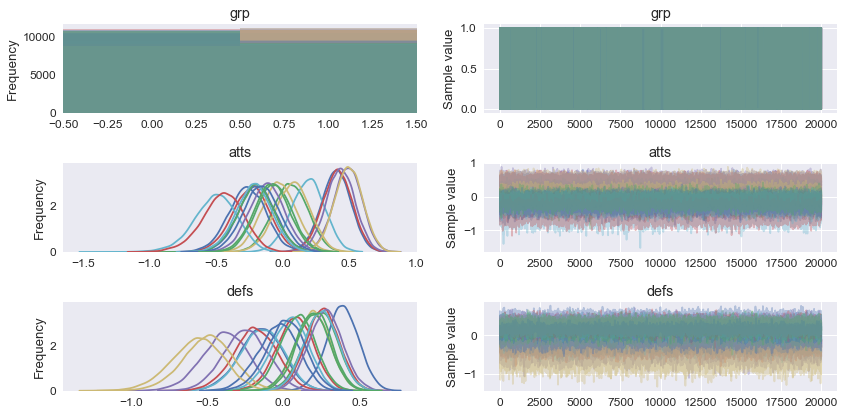

In [42]:
pm.traceplot(trace2, varnames=var_names2);

Model predicts following teams as belonging to the "rest" (ordinary) category:

In [43]:
pos = trace2['grp'].mean(axis=0)
pos = np.asarray([1 if x > 0.5 else 0 for x in pos])
n = teams['name'].values
n[np.argwhere(pos==0)]

array([[u'Bournemouth'],
       [u'Burnley'],
       [u'Crystal Palace'],
       [u'Hull City'],
       [u'Leicester City'],
       [u'Middlesbrough'],
       [u'Southampton'],
       [u'Stoke City'],
       [u'Sunderland'],
       [u'Swansea City'],
       [u'Watford'],
       [u'West Bromwich Albion'],
       [u'West Ham United']], dtype=object)

Model predicts following teams as the **top teams**. It can be seen that these are actually top teams from the 2016 - 2017 Premier League Season table.

In [44]:
n[np.argwhere(pos==1)]

array([[u'Arsenal'],
       [u'Chelsea'],
       [u'Everton'],
       [u'Liverpool'],
       [u'Manchester City'],
       [u'Manchester United'],
       [u'Tottenham Hotspur']], dtype=object)

In [45]:
x_vals2 = trace2['atts'].mean(axis=0)
y_vals2 = trace2['defs'].mean(axis=0)

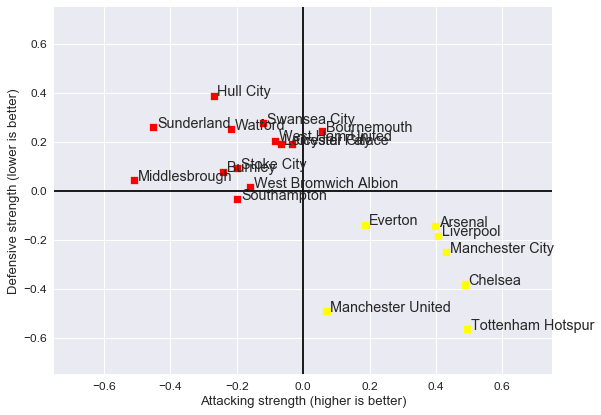

In [46]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x_vals2, y_vals2, marker='s', s=50, c=pos, cmap=plt.cm.autumn)
for label, x, y in zip(teams['name'].values, x_vals2, y_vals2):
    ax.annotate(label, xy=(x,y), xytext=(x+0.01,y))
ax.set_xlabel('Attacking strength (higher is better)')
ax.set_ylabel('Defensive strength (lower is better)')
ax.set_xlim(-0.75, 0.75)
ax.hlines(0, *ax.get_xlim())
ax.set_ylim(-0.75, 0.75)
ax.vlines(0, *ax.get_ylim())
plt.tight_layout()
plt.show()

In [47]:
xall = []
for a, b in zip(x_vals, x_vals2):
    xall.append(a)
    xall.append(b)
yall = []
for a, b in zip(y_vals, y_vals2):
    yall.append(a)
    yall.append(b)

The following figure shows the reduction of shrinkage (in the hierarchical Bayes model) which results from introducing model with two groups (top teams and the rest). With introduction of the model with two groups, shrinkage is noticeably reduced, particularly among the top teams and between the top teams and the rest. 

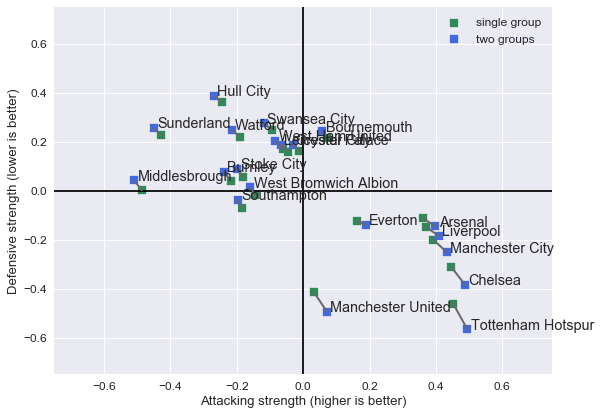

In [48]:
# Reducing shrinkage in hierarchical model
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x_vals, y_vals, marker='s', s=50, c='seagreen', label='single group')
ax.scatter(x_vals2, y_vals2, marker='s', s=50, c='royalblue', label='two groups')
for i in range(0,len(xall),2):
    ax.plot(xall[i:i+2], yall[i:i+2], c='dimgrey', ls='-', lw=2)
for label, x, y in zip(teams['name'].values, x_vals2, y_vals2):
    ax.annotate(label, xy=(x,y), xytext=(x+0.01,y))
ax.legend(loc='upper right')
ax.set_xlabel('Attacking strength (higher is better)')
ax.set_ylabel('Defensive strength (lower is better)')
ax.set_xlim(-0.75, 0.75)
ax.hlines(0, *ax.get_xlim())
ax.set_ylim(-0.75, 0.75)
ax.vlines(0, *ax.get_ylim())
plt.tight_layout()
plt.show()

In [49]:
X = np.c_[x_vals2, y_vals2]

In [50]:
# Compute clustering with KMeans
model = KMeans(n_clusters=2)  # No. of clusters as input
model.fit(X)
cluster_centers = model.cluster_centers_       
labels = model.labels_

Two different clusters of teams are clearly identifiable:

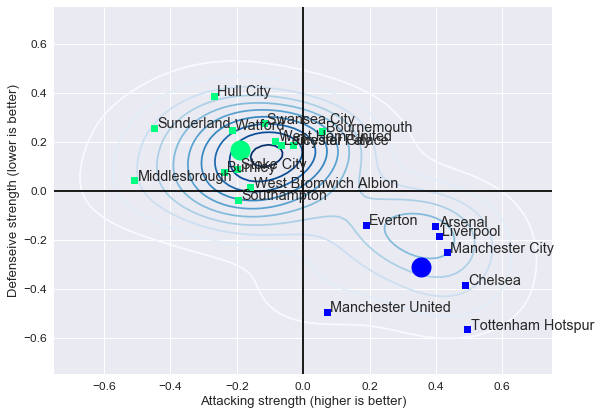

In [51]:
n_clusters = 2
fig, ax = plt.subplots(figsize=(8,6))
sns.kdeplot(x_vals, y_vals, shade=False, shade_lowest=False, cmap=plt.cm.get_cmap('Blues'), ax=ax)       
for label, x, y in zip(teams['name'].values, x_vals2, y_vals2):
    ax.annotate(label, xy=(x,y), xytext=(x+0.01,y))
colors = plt.cm.winter(np.linspace(0, 1, n_clusters))  # generate colours
if n_clusters > 0:
    for k, col in zip(range(n_clusters), colors):
        # Cluster centers
        cluster_center = cluster_centers[k]
        ax.plot(cluster_center[0], cluster_center[1], marker='o', markerfacecolor=col,
                markeredgecolor='black', markersize=20, label='cluster center')
        # Cluster members
        members = (labels == k)
        ax.plot(X[members, 0], X[members, 1], ls='', marker='s', c=col)
#ax.legend(loc='upper right')
ax.set_xlabel('Attacking strength (higher is better)')
ax.set_ylabel('Defenseive strength (lower is better)')
ax.set_xlim(-0.75, 0.75)
ax.hlines(0, *ax.get_xlim())
ax.set_ylim(-0.75, 0.75)
ax.vlines(0, *ax.get_ylim())
plt.tight_layout()
plt.show()

### Simulate a season using the model

In [52]:
# Simulate season from the original model
def simulate_one_season(trace, df):
    num_samples = trace['defs'].shape[0]
    # Draw a single set of parameters from the trace
    draw = np.random.randint(0, num_samples)
    if 'intercept' in trace.varnames:
        intercept = trace['intercept'][draw]
    home = trace['home'][draw]
    atts = trace['atts'][draw]
    atts_draw = pd.DataFrame({'att':atts})
    defs = trace['defs'][draw]
    defs_draw = pd.DataFrame({'def':defs})
    
    season = df.copy()
    season = pd.merge(season, atts_draw, left_on='home_i', right_index=True)
    season = pd.merge(season, defs_draw, left_on='home_i', right_index=True)
    season = season.rename(columns = {'att': 'att_home', 'def': 'def_home'})
    season = pd.merge(season, atts_draw, left_on='away_i', right_index=True)
    season = pd.merge(season, defs_draw, left_on='away_i', right_index=True)
    season = season.rename(columns = {'att': 'att_away', 'def': 'def_away'})
    season['home_val'] = home
    if 'intercept' in trace.varnames:
        season['intercept'] = intercept
        season['home_theta'] = season.apply(lambda x: np.exp(x['intercept'] + x['home_val'] + 
                                            x['att_home'] + x['def_away']), axis=1)
        season['away_theta'] = season.apply(lambda x: np.exp(x['intercept'] + 
                                            x['att_away'] + x['def_home']), axis=1)
    else:
        season['home_theta'] = season.apply(lambda x: np.exp(x['home_val'] + 
                                            x['att_home'] + x['def_away']), axis=1)
        season['away_theta'] = season.apply(lambda x: np.exp(x['att_away'] + x['def_home']), axis=1)        
    season['home_goals'] = season.apply(lambda x: np.random.poisson(x['home_theta']), axis=1)
    season['away_goals'] = season.apply(lambda x: np.random.poisson(x['away_theta']), axis=1)
    season['home_outcome'] = season.apply(lambda x: home_outcome(x['home_goals'], x['away_goals']), axis=1)
    season['away_outcome'] = season.apply(lambda x: away_outcome(x['home_goals'], x['away_goals']), axis=1)
    season = season.join(pd.get_dummies(season['home_outcome'], prefix='home'))
    season = season.join(pd.get_dummies(season['away_outcome'], prefix='away'))
    return season

In [65]:
season = simulate_one_season(trace, df_freeze)

In [54]:
def create_season_table(season, teams):
    g = season.groupby('home_i')
    home = pd.DataFrame({'home_goals':g['home_goals'].sum(),
                         'home_goals_against':g['away_goals'].sum(),
                         'home_wins':g['home_win'].sum(),
                         'home_draws':g['home_draw'].sum(),
                         'home_losses':g['home_loss'].sum()})
    g = season.groupby('away_i')
    away = pd.DataFrame({'away_goals':g['away_goals'].sum(),
                         'away_goals_against':g['home_goals'].sum(),
                         'away_wins':g['away_win'].sum(),
                         'away_draws':g['away_draw'].sum(),
                         'away_losses':g['away_loss'].sum()})
    df = home.join(away)
    df['W'] = df['home_wins'] + df['away_wins']
    df['D'] = df['home_draws'] + df['away_draws']
    df['L'] = df['home_losses'] + df['away_losses']
    df['Pts'] = df['W']*3 + df['D']
    df['GF'] = df['home_goals'] + df['away_goals']
    df['GA'] = df['home_goals_against'] + df['away_goals_against']
    df['GD'] = df['GF'] - df['GA']
    df = pd.merge(teams, df, left_on='i', right_index=True)
    df = df.sort_values(by=['Pts', 'GD'], ascending=False).reset_index()
    df['CL'] = (df.index < 4).astype(int)
    df['C'] = (df.index == 0).astype(int)
    table = df[['name', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'C', 'CL']]
    return table

#### Simulated season table (example)

It can be seen that *Manchester City* is a champion in this simulated season with 83 points and a goal difference of +51. At the same time, *Chelsea* finished at the 4th place in this simulated season with 66 points and a goal difference of +23.

In [66]:
table = create_season_table(season, teams_freeze)
table

,name,W,D,L,GF,GA,GD,Pts,C,CL
0,Manchester United,26,8,4,69,20,49,86,1,1
1,Liverpool,26,6,6,94,44,50,84,0,1
2,Manchester City,23,8,7,97,46,51,77,0,1
3,Arsenal,23,8,7,68,28,40,77,0,1
4,Chelsea,24,4,10,93,44,49,76,0,0
5,Tottenham Hotspur,21,6,11,65,46,19,69,0,0
6,West Ham United,15,10,13,49,43,6,55,0,0
7,Crystal Palace,14,10,14,56,66,-10,52,0,0
8,West Bromwich Albion,14,8,16,47,55,-8,50,0,0
9,Everton,14,6,18,73,74,-1,48,0,0


### Simulate many seasons from the model

Simulated seasons have only the same twenty teams from the 2016 - 2017 season, which means that the relegation of teams as well as introduction of teams to and from lower leagues is not taken into account.

In [56]:
def simulate_seasons(trace, df, teams, n=100):
    dfs = []
    for i in range(n):
        s = simulate_one_season(trace, df)
        t = create_season_table(s, teams)
        t['iter'] = i
        dfs.append(t)
    return pd.concat(dfs, ignore_index=True)

In [67]:
sims = simulate_seasons(trace, df_freeze, teams_freeze, 1000)  # simulate 1000 seasons

Let's see what is the *most probable* number of points that the **Manchester United** will score in a season:

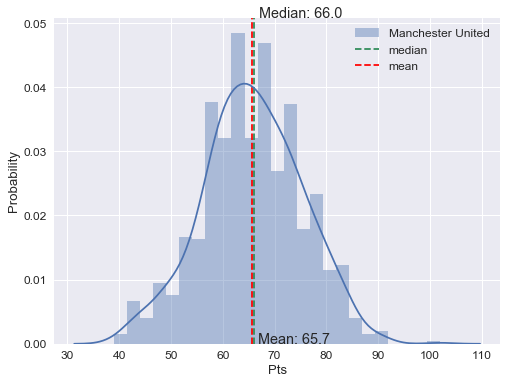

In [68]:
team_name = 'Manchester United'
points = sims['Pts'].loc[sims['name'] == team_name]
median = sims['Pts'].loc[sims['name'] == team_name].median()
mean = sims['Pts'].loc[sims['name'] == team_name].mean()
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(points, ax=ax, label=team_name)
ax.vlines(median, *ax.get_ylim(), colors='seagreen', linestyles='--', label='median')
ax.vlines(mean, *ax.get_ylim(), colors='red', linestyles='--', label='mean')
ax.annotate('Median: {:.1f}'.format(median), xy=(median+1, ax.get_ylim()[1]))
ax.annotate('Mean: {:.1f}'.format(mean), xy=(mean+1, ax.get_ylim()[0]))
ax.legend(loc='upper right')
ax.set_ylabel('Probability')
plt.show()

Let's compare the number of points that two very different teams (**Chelsea** and **Swansea City**) will score in a season:

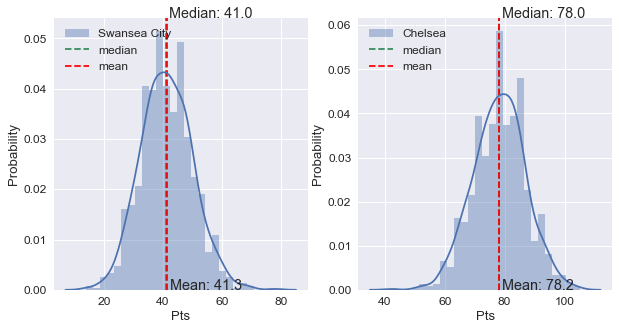

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
for i, name in enumerate(['Swansea City', 'Chelsea']):
    points = sims['Pts'].loc[sims['name'] == name]
    median = sims['Pts'].loc[sims['name'] == name].median()
    mean = sims['Pts'].loc[sims['name'] == name].mean()
    sns.distplot(points, ax=ax[i], label=name)
    ax[i].vlines(median, *ax[i].get_ylim(), colors='seagreen', linestyles='--', label='median')
    ax[i].vlines(mean, *ax[i].get_ylim(), colors='red', linestyles='--', label='mean')
    ax[i].annotate('Median: {:.1f}'.format(median), xy=(median+1, ax[i].get_ylim()[1]))
    ax[i].annotate('Mean: {:.1f}'.format(mean), xy=(mean+1, ax[i].get_ylim()[0]))
    ax[i].legend(loc='upper left')
    ax[i].set_ylabel('Probability')
plt.show()

What is the probability that the **Swansea City** will score more than **60 points** in a Premier League season?

In [70]:
points = sims['Pts'].loc[sims['name'] == 'Swansea City']
swa_points = (float(len(points[points > 60.]))/float(len(points)))*100.
print('Probability of Swansea City scoring more than 60 points: {:.2f} (%)'.format(swa_points))

Probability of Swansea City scoring more than 60 points: 1.80 (%)


What is the probability that the **Chelsea** will score more than **60 points** in a Premier League season?

In [71]:
points = sims['Pts'].loc[sims['name'] == 'Chelsea']
che_points = (float(len(points[points > 60.]))/float(len(points)))*100.
print('Probability of Chelsea scoring more than 60 points: {:.2f} (%)'.format(che_points))

Probability of Chelsea scoring more than 60 points: 97.50 (%)


Obviously, Chelsea is much better team then Swansea City! This is very clear from the 2016 - 2017 Premier League Season table.

### Simulate games between teams and compute betting odds 
#### European style betting coefficients

In [62]:
# Simulate large number of games between two teams
def simulate_games(home, away, trace, num_simul=100):
    outcome = {'win':0, 'loss':0, 'draw':0}
    for k in range(num_simul):
        s = simulate_one_season(trace, df_freeze)  # trace from the model
        h = s[(s['home']==home) & (s['away']==away)]
        outcome['win']  += h['home_win'].values[0]
        outcome['loss'] += h['home_loss'].values[0]
        outcome['draw'] += h['home_draw'].values[0]
    for key in outcome.keys():
        outcome[key] = float(outcome[key])/num_simul
        outcome[key] = 1./outcome[key]  # odds
    return outcome

#### Chelsea vs Swansea City

In [72]:
# Chelsea is playing at home against the Swansea City 
# Chelsea has home field advantage
home_team = 'CHE'
away_team = 'SWA'
che_swa_home = simulate_games(home_team, away_team, trace, 1000)  # 1000 simulated games
# Betting odds
che_swa_home

{'draw': 7.936507936507937,
 'loss': 12.987012987012987,
 'win': 1.2547051442910915}

In [ ]:
Chelsea vs Swansea City:
-------------------------
|   1   |   X   |   2   |
-------------------------
| 1.25 |  7.94  | 12.99 |
-------------------------

These coefficents reflect the actual probability. This is called a 100% market or book, which gives no advantage (margin) to either the person placing or the side accepting the bet. They are corrected by bookmakers in order to secure their margin.

> *Bookmakers make a profit by accepting bets on a given market and adjusting odds to attract bets in the right proportion in order to secure a profit regardless of the outcome. This is achieved by offering odds that are higher than the actual statistical probability of the event concerned. This deviation represents the bookmaker’s margin, i.e. what a bookmaker is charging you for making betting available.*

In other words, by lowering the coefficients from their actual values, one introduces the margin. For example, if the bookmaker were to offer the following coeficients on the above (CHE-SWA) game: 1:1.25, X:7.5, 2:10.0, he/she would introduce a margin of ~3.3 %. Actual bookmakers margins are around 5 % to 7 %.

In [83]:
# Chelsea is playing away at the Swansea City 
# Swansea City has home field advantage
home_team = 'SWA'
away_team = 'CHE'
che_swa_away = simulate_games(home_team, away_team, trace, 1000)  # 1000 simulated games
# Betting odds
che_swa_away

{'draw': 5.319148936170213,
 'loss': 1.4577259475218658,
 'win': 7.936507936507937}

In [ ]:
Swansea City vs Chelsea:
------------------------ 
|  1   |   X   |   2   |
------------------------
| 7.93 |  5.32  | 1.46 |
------------------------

It can be seen from the above results that the betting coeffcient for Chelsea winning when playing at home is small (1.25). Also, betting coeffcient for Swansea City losing at home is small (1.46), although it is somewhat higher than the coefficient for Chelsea winning at home. Both of these events have high probability of occurence (according to the simulation data). Also, it can be seen that the Swansea City home advantage is lovering the betting coefficient on the Chelsea win (which should be expected).

Betting coefficient on Swansea City winning at home is lower than the betting coefficient of Swansea City winning away (7.93 to 12.82), which is expected, since in the latter case the Chelsea has the home field advantage.

#### Chelsea vs Arsenal

In [84]:
# Chelsea is playing at home against the Arsenal
# Chelsea has home field advantage
home_team = 'CHE'
away_team = 'ARS'
che_ars_home = simulate_games(home_team, away_team, trace, 1000)  # 1000 simulated games
# Betting odds
che_ars_home

{'draw': 4.784688995215311,
 'loss': 5.6818181818181825,
 'win': 1.6260162601626016}

In [ ]:
Chelsea vs Arsenal:
-----------------------
|  1   |   X   |   2  |
|---------------------|
| 1.63 |  5.68 | 4.78 |
-----------------------

In [85]:
# Chelsea is playing away at the Arsenal
# Arsenal has home field advantage
home_team = 'ARS'
away_team = 'CHE'
che_ars_away = simulate_games(home_team, away_team, trace, 1000)  # 1000 simulated games
# Betting odds
che_ars_away

{'draw': 4.424778761061947,
 'loss': 2.5125628140703515,
 'win': 2.6595744680851063}

In [ ]:
Arsenal vs Chelsea:
-----------------------
|  1   |   X   |   2  |
-----------------------
| 2.66 |  4.42 | 2.51 |
-----------------------

Betting coefficient on the Chealsea winning at home against Arsenal is 1.63, while the betting coefficient on the Arsenal winning at home against Chelsea is 2.66. Betting coefficient on the Chealsea winning away (at the Arsenal home field) is 2.51, which gives a slight advantage to the Chelsea winning this game as well.

### Predict a Premier League Champion from the simulation data

Predicting a champion is a "tricky" bussiness, but also mandatory :-). Let's give it a try.

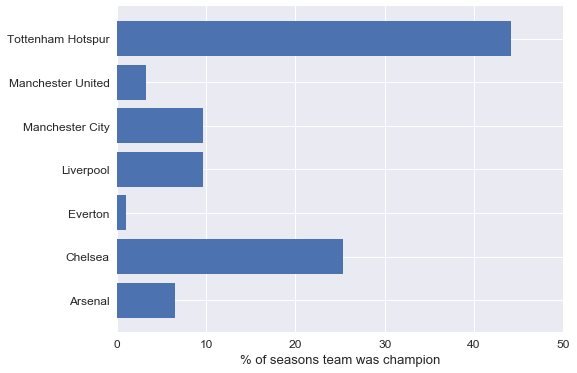

In [73]:
g = sims.groupby('name')
champs = pd.DataFrame({'perc_C':g['C'].mean()})
champs = champs.sort_values(by='perc_C', ascending=False).reset_index()
champs = champs[champs['perc_C'] > 0.005]
fig, ax = plt.subplots(figsize=(8,6))
ax.barh(champs['name'], champs['perc_C']*100.)
ax.set_xlim(0,50)
ax.set_xlabel('% of seasons team was champion')
plt.show()

It can be seen that the *Tottenham Hotspur* has a probability of being a champion at the level of 44 %.

In [74]:
champs

,name,perc_C
0,Tottenham Hotspur,0.441
1,Chelsea,0.253
2,Liverpool,0.097
3,Manchester City,0.097
4,Arsenal,0.065
5,Manchester United,0.033
6,Everton,0.010


### Champions League qualifiers

Compute the percent of simulated seasons each team finished in the top 4 positions which qualify it for the Champions League:

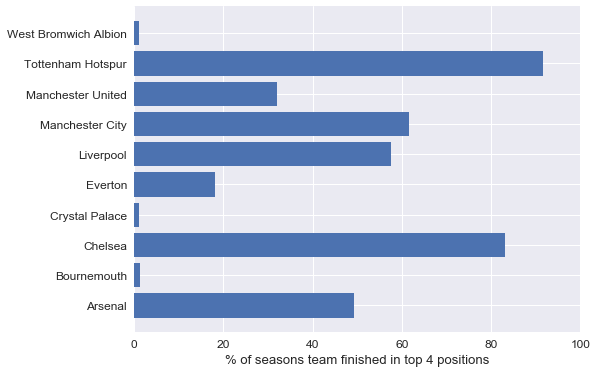

In [75]:
g = sims.groupby('name')
champs = pd.DataFrame({'perc_CL':g['CL'].mean()})
champs = champs.sort_values(by='perc_CL', ascending=False).reset_index()
champs = champs[champs['perc_CL'] > 0.01]  # only teams with more than 1%
fig, ax = plt.subplots(figsize=(8,6))
ax.barh(champs['name'], champs['perc_CL']*100.)
ax.set_xlim(0,100)
ax.set_xlabel('% of seasons team finished in top 4 positions')
plt.show()

It can be seen that the *Tottenham Hotspur* will qualify for the Champions League with probability of 92 %, followed by the *Chelsea* with probability of 83 %, *Manchester City* with probability of 61 %, etc.

In [76]:
champs

,name,perc_CL
0,Tottenham Hotspur,0.916
1,Chelsea,0.830
2,Manchester City,0.615
3,Liverpool,0.575
4,Arsenal,0.492
5,Manchester United,0.321
6,Everton,0.181
7,Bournemouth,0.014
8,Crystal Palace,0.012
9,West Bromwich Albion,0.011


**Disclaimer**: This notebook is furnished "as is". The author does not provide any warranty whatsoever, whether express, implied, or statutory, including, but not limited to, any warranty of merchantability or fitness for a particular purpose or any warranty that the contents of the notebook will be error-free. In no respect shall the author incur any liability for any damages resulting from, or in any way connected to the use of the notebook material, whether or not loss was sustained from, or arose out of, the usage of the results of the notebook material.